In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
print(f'Tensorflow version: {tensorflow.__version__}')


Tensorflow version: 2.16.1


Total classes are: 2


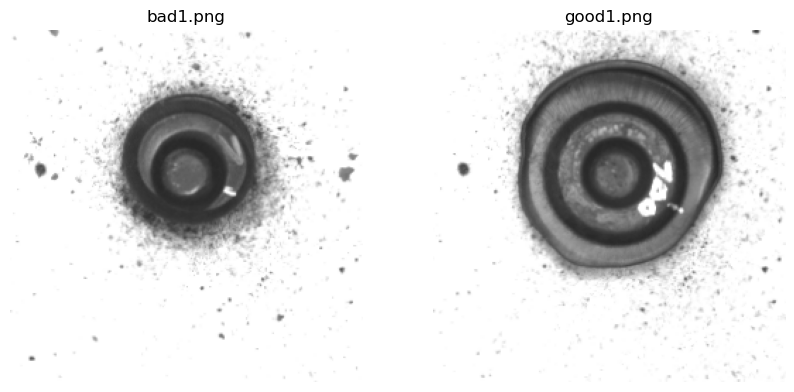

In [2]:
data_folder = "C:\LUH\Master\Masterarbeit\Stereo_camera_program\Daten\good_or_bad_oversampled"

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(f'Total classes are: {len(classes)}')

# Show the first image in each folder
fig = plt.figure(figsize=(10,6))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(1, len(classes), i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()  

input_shape = (250, 250, 3)  # Assuming 150x150 RGB images
num_classes = 2  # Number of output classes
batch_size = 32
epochs = 10

In [3]:

img_size = (250, 250)
batch_size = 30

print("Getting Data...")
datagen_train = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1, # hold back 30% of the images for validation
                             horizontal_flip=True,
                             brightness_range=(0.7,1.4)) 

datagen_valid = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1 # hold back 30% of the images for validation
                             ) 

print("Preparing training dataset...")
train_generator = datagen_train.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen_valid.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')
print(classnames)

Getting Data...
Preparing training dataset...
Found 1952 images belonging to 2 classes.
Preparing validation dataset...
Found 216 images belonging to 2 classes.
Data generators ready
['bad', 'good']


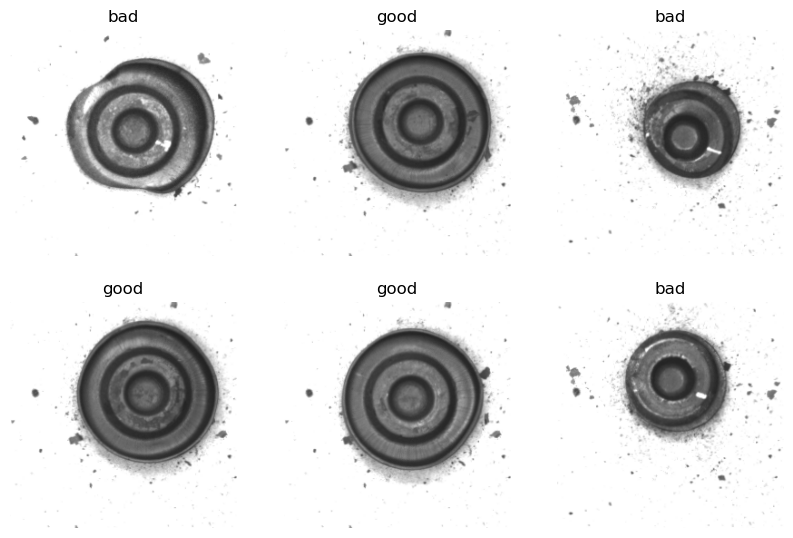

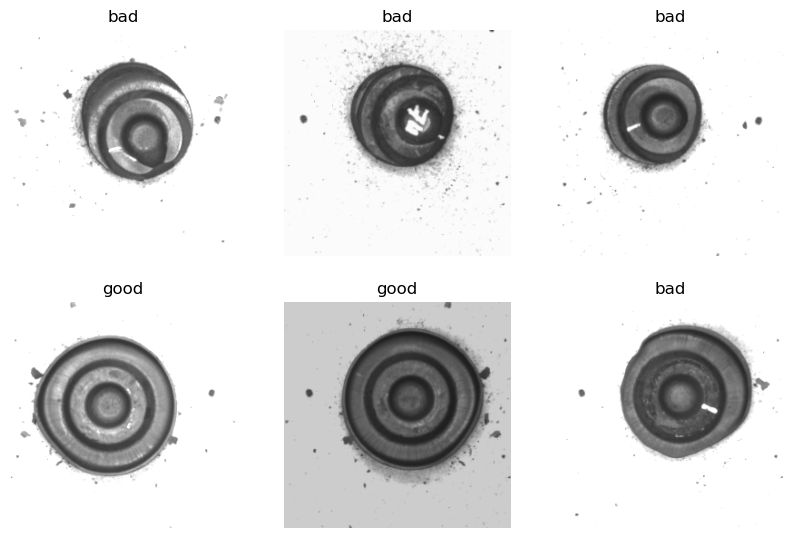

In [4]:
import matplotlib.pyplot as plt

valid_batch_images, valid_batch_labels = next(validation_generator)
train_batch_images, train_batch_labels = next(train_generator)
# Define a function to display images
def show_images(images, labels):
    # Create a grid of 3x3 images
    plt.figure(figsize=(10, 10))
    for i in range(6):
        condition = labels[i] == 1.  
        indices = np.where(condition)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classnames[int(indices[0])])
        plt.axis('off')  # Hide axis
    plt.show()

# Display the batch of images
show_images(valid_batch_images, valid_batch_labels)
show_images(train_batch_images, train_batch_labels)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

C:\Users\nikla\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,872,578 (52.92 MB)

 Trainable params: 13,872,578 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = '/tmp/checkpoint.keras'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

callbacks = [
             EarlyStopping(patience=2),
             model_checkpoint_callback,
]

num_epochs = 50


history= model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/50


C:\Users\nikla\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.7305 - loss: 1.3071 - val_accuracy: 0.9714 - val_loss: 0.1254
Epoch 2/50
 1/65 ━━━━━━━━━━━━━━━━━━━━ 1:44 2s/step - accuracy: 0.9667 - loss: 0.1712

d:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9667 - loss: 0.0869 - val_accuracy: 1.0000 - val_loss: 0.0272
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9520 - loss: 0.1248 - val_accuracy: 0.9571 - val_loss: 0.0969
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0265 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9783 - loss: 0.0599 - val_accuracy: 0.9762 - val_loss: 0.0397
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9667 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 2.8021e-04
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9962 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.7835e-04 - val_accuracy: 1.0000 - val_loss: 1.4586e-04
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9981 - loss: 0.0082 - val_accuracy: 1.0000 - val_l

In [ ]:


training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
epoch_nums = range(1,len(training_loss)+1)
plt.figure(figsize=(10,6))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('Epoch')
plt.ylabel('Verlust')
plt.legend(['Trainingsdaten ', 'Validationsdaten'], loc='upper right')
plt.show()


Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


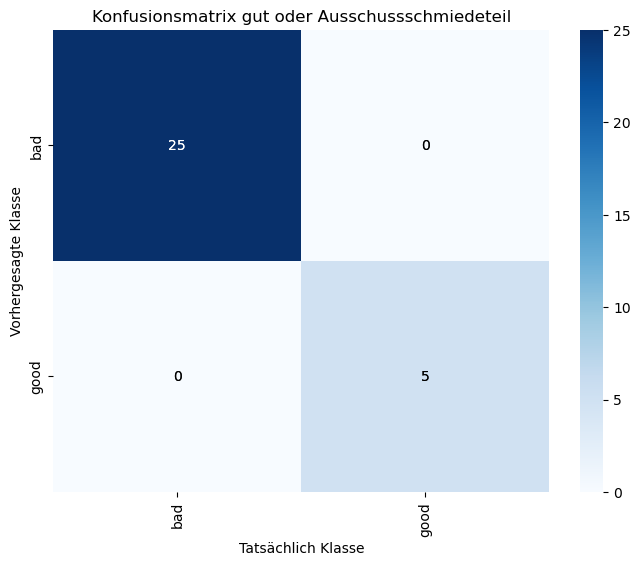

In [11]:
print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[3][0]
y_test = validation_generator[3][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)
import seaborn as sns
cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add counts to plot
colors=['white','black', 'black']
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j+0.5, i+0.5, str(cm[i][j]), ha='center', va='center', color=colors[i+j])
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks+0.5, classnames, rotation=90)
plt.yticks(tick_marks+0.5, classnames)
plt.xlabel("Tatsächlich Klasse")
plt.ylabel("Vorhergesagte Klasse")
plt.title('Konfusionsmatrix gut oder Ausschussschmiedeteil')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


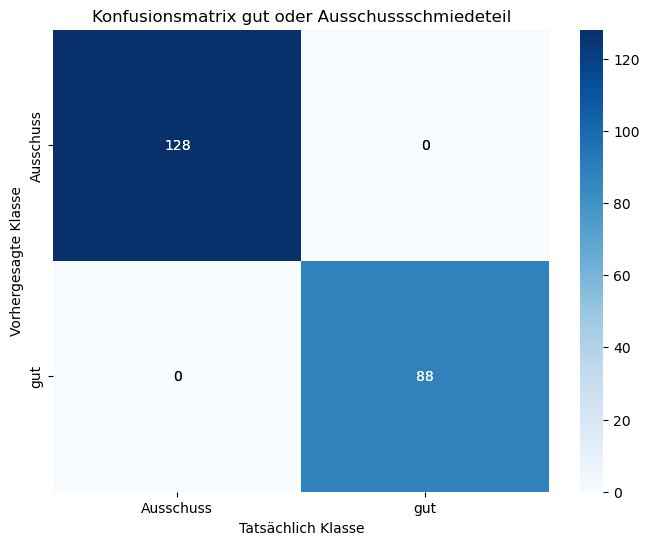

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to accumulate predictions and true labels
all_predictions = []
all_true_labels = []

# Iterate through the validation generator to collect all data
for i in range(len(validation_generator)):
    x_test = validation_generator[i][0]
    y_test = validation_generator[i][1]
    
    class_probabilities = model.predict(x_test)
    predictions = np.argmax(class_probabilities, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    
    all_predictions.extend(predictions)
    all_true_labels.extend(true_labels)

# Convert lists to numpy arrays
all_true_labels = np.array(all_true_labels)
all_predictions = np.array(all_predictions)

# Calculate confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plot the confusion matrix
classnames = ['Ausschuss', 'gut']  # Update classnames accordingly
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add counts to plot
colors = ['white', 'black', 'white', 'green']
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j + 0.5, i + 0.5, str(cm[i][j]), ha='center', va='center', color=colors[i + j])

tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks + 0.5, classnames, rotation=0)
plt.yticks(tick_marks + 0.5, classnames)
plt.xlabel("Tatsächlich Klasse")
plt.ylabel("Vorhergesagte Klasse")
plt.title('Konfusionsmatrix gut oder Ausschussschmiedeteil')
plt.show()

In [8]:
from sklearn.metrics import precision_score, recall_score



class_probabilities = model.predict(validation_generator)
predictions = np.argmax(class_probabilities, axis=1)
y_true = validation_generator.classes

# Calculate precision and recall
precision = precision_score(y_true, predictions.round(), average='weighted')
recall = recall_score(y_true, predictions.round(), average='weighted')
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
#precision, recall, loss, accuracy 
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}' )

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 1.0000 - loss: 7.8106e-07
Loss: 8.810056328911742e-07, Accuracy: 1.0, Precision: 0.5185185185185185, Recall: 0.5185185185185185


In [ ]:


# Save the trained model
modelFileName = 'cnn_good_orbad_over.keras'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName) 

In [8]:
cnn= tensorflow.keras.models.load_model('cnn_good_orbad_over.keras')
model = cnn

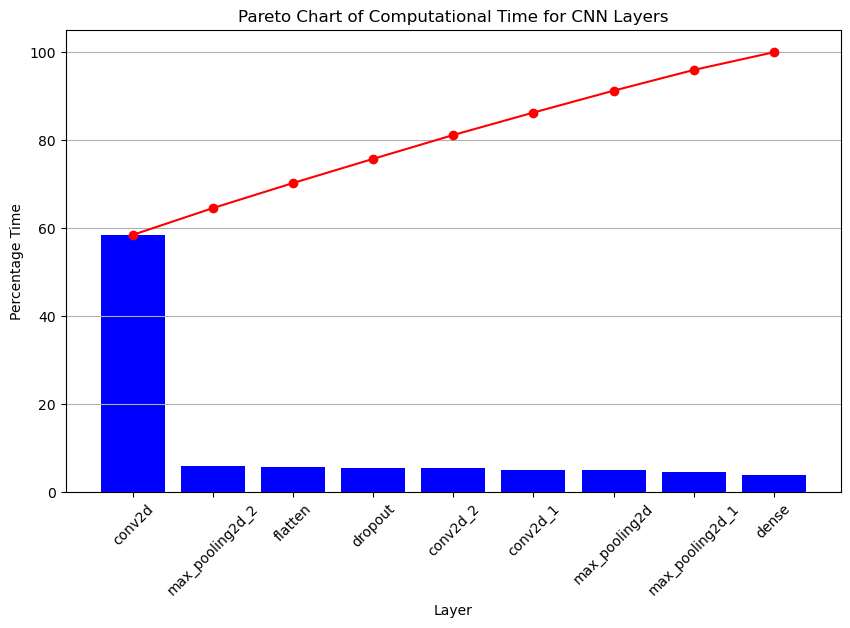

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Define input shape (replace this with your model's input shape)
input_shape = (250, 250, 3)  # Example input shape

# Define a sample input for profiling (replace this with your actual data)
sample_input = np.random.rand(1, *input_shape)  # Unpack input_shape

# Profile the model
@tf.function
def profile_model(input_data):
    output = model(input_data)
    return output

# Run inference and collect the time taken by each layer
layer_times = []
for layer in model.layers:
    layer_start_time = time.time()
    _ = profile_model(sample_input)
    layer_end_time = time.time()
    layer_times.append((layer.name, layer_end_time - layer_start_time))

# Calculate total time taken by each layer
total_time = sum(time for _, time in layer_times)

# Calculate percentage time taken by each layer
percentage_times = [(name, time / total_time * 100) for name, time in layer_times]

# Sort layers by descending order of computational time
sorted_layers = sorted(percentage_times, key=lambda x: x[1], reverse=True)

# Extract layer names and percentage times
layer_names = [name for name, _ in sorted_layers]
percentage_values = [time for _, time in sorted_layers]

# Calculate cumulative percentage
cumulative_percentage = np.cumsum(percentage_values)

# Create Pareto chart
plt.figure(figsize=(10, 6))
plt.bar(layer_names, percentage_values, color='b')
plt.plot(layer_names, cumulative_percentage, color='r', marker='o')
plt.xlabel('Layer')
plt.ylabel('Percentage Time')
plt.title('Pareto Chart of Computational Time for CNN Layers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




In [12]:
import cv2


def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index
class_idx= np.ones(690)
class_idx[class_idx==1]=-1

for i in range(690):
    try:
        img = cv2.imread("C:\LUH\Master\Masterarbeit\Stereo_camera_program\Daten\crop\crop" +str(i+1) + ".png")
    
        class_idx[i] = predict_image(cnn, img)
    except:
        print(i+1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [13]:

len(np.argwhere(class_idx == 1))

45